In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [73]:
train_dataset = pd.read_csv('https://raw.githubusercontent.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/master/Dataset/train_ctrUa4K.csv')

In [74]:
train_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
test_dataset = pd.read_csv("https://raw.githubusercontent.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/master/Dataset/test_lAUu6dG.csv")

In [76]:
test_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [77]:
train_original=train_dataset.copy()
test_original=test_dataset.copy()

In [78]:
train_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [79]:
test_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [80]:
train_dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [81]:
train_dataset.shape

(614, 13)

In [82]:
test_dataset.shape

(367, 12)

In [83]:
train_dataset['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [84]:
train_dataset['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

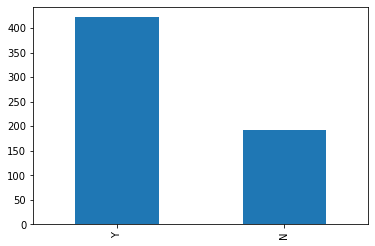

In [85]:
train_dataset['Loan_Status'].value_counts().plot.bar()

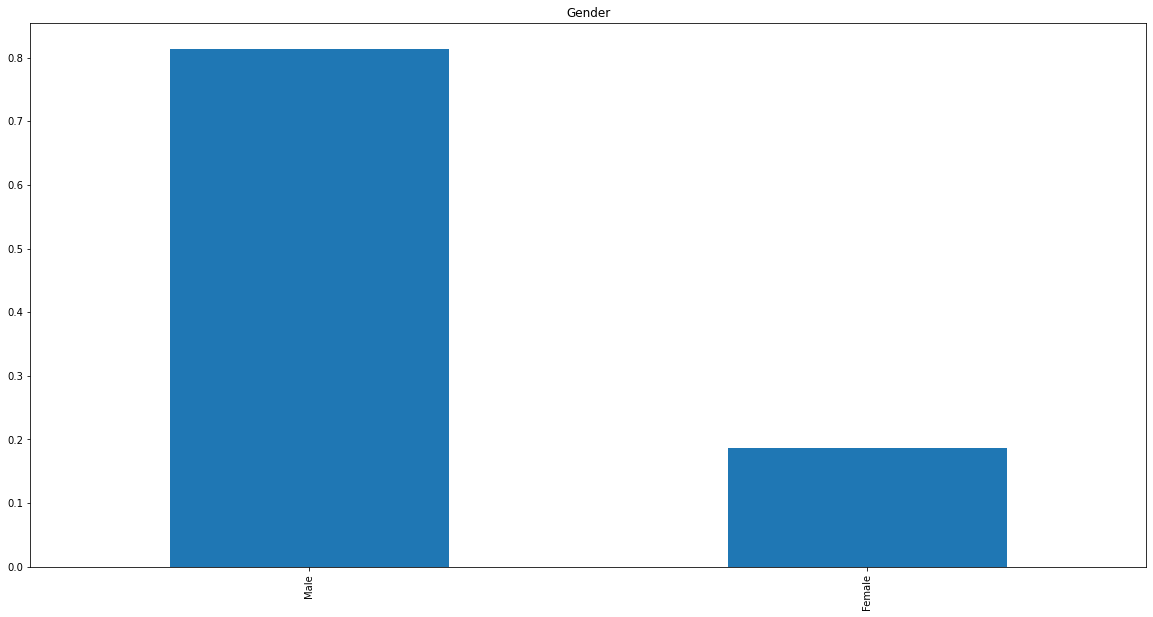

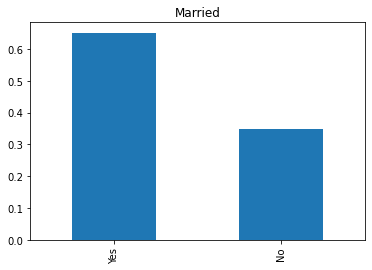

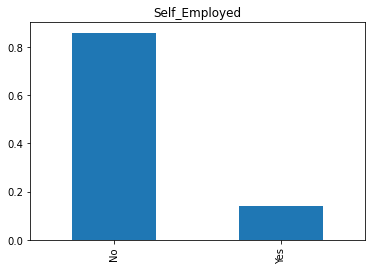

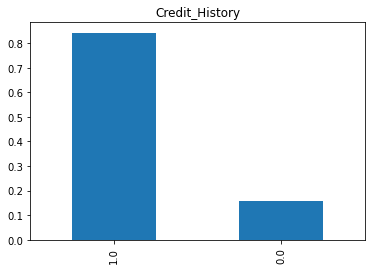

In [86]:
train_dataset['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()
train_dataset['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train_dataset['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train_dataset['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

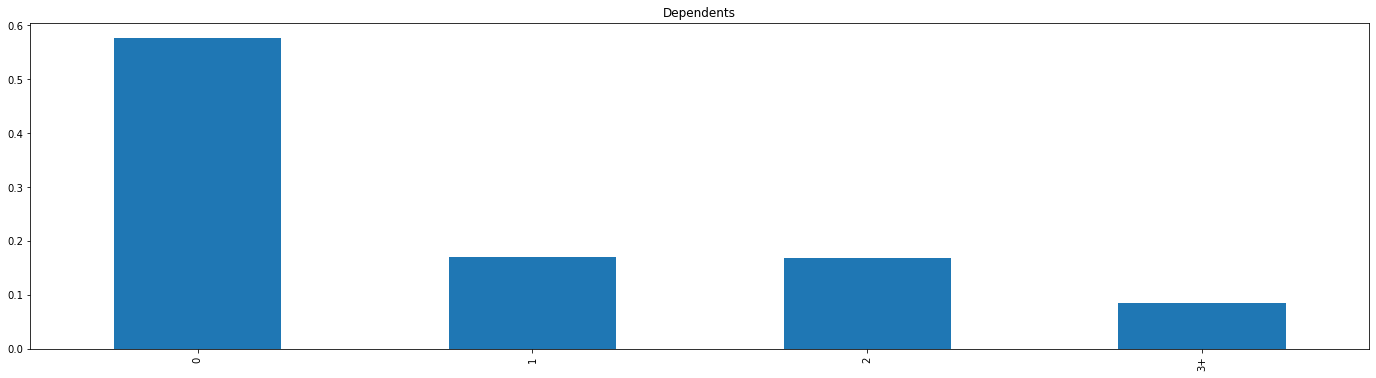

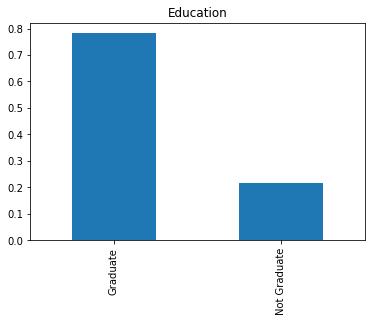

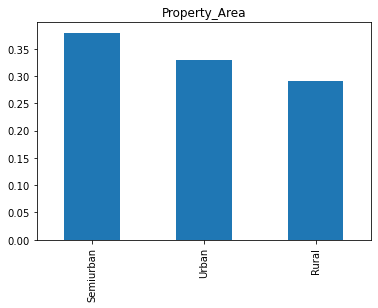

In [87]:
train_dataset['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
train_dataset['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train_dataset['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

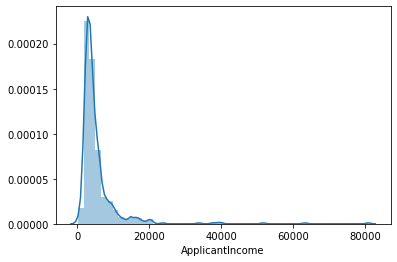

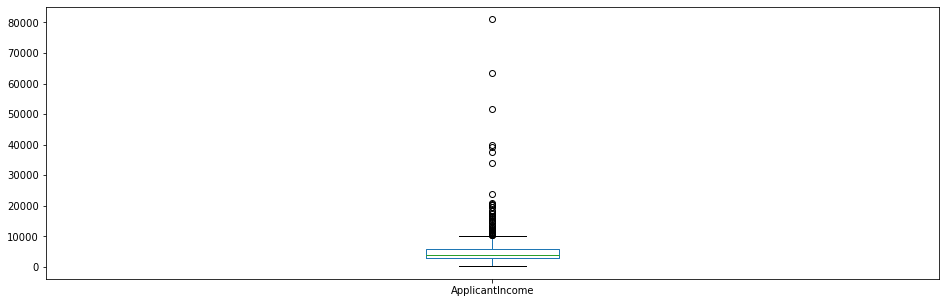

In [88]:
sns.distplot(train_dataset['ApplicantIncome'])
plt.show()
train_dataset['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

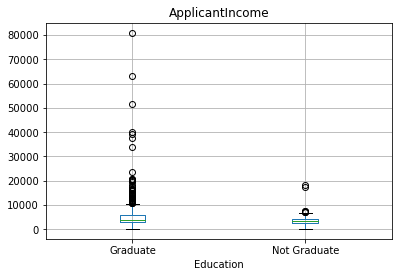

In [89]:
train_dataset.boxplot(column="ApplicantIncome", by = "Education") 
plt.suptitle("")

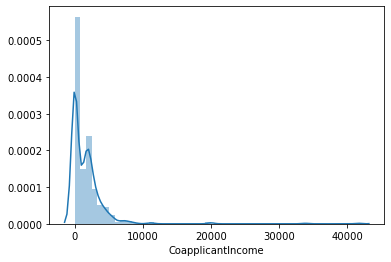

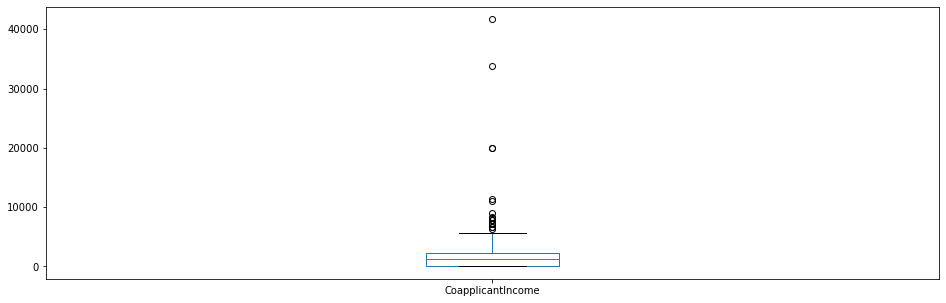

In [90]:
sns.distplot(train_dataset['CoapplicantIncome'])
plt.show()
train_dataset['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

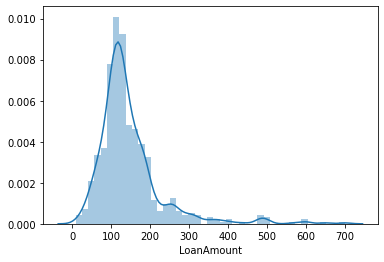

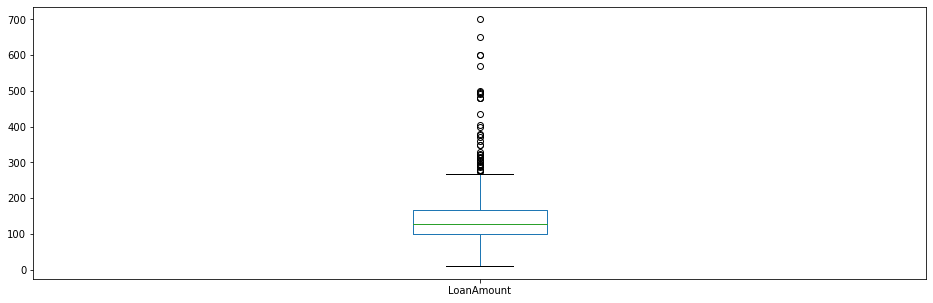

In [91]:
train_dataset.notna()
sns.distplot(train_dataset['LoanAmount'])
plt.show()
train_dataset['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

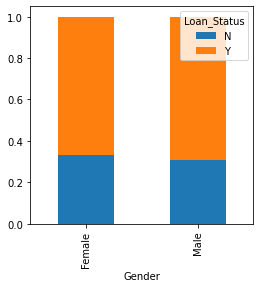

In [92]:
Gender = pd.crosstab(train_dataset['Gender'], train_dataset['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind='bar', stacked=True, figsize = (4,4))
plt.show()

In [93]:
Married = pd.crosstab(train_dataset['Married'], train_dataset['Loan_Status'])
Dependents = pd.crosstab(train_dataset['Dependents'], train_dataset['Loan_Status'])
Education  = pd.crosstab(train_dataset['Education'], train_dataset['Loan_Status'])
Self_Employed = pd.crosstab(train_dataset['Self_Employed'], train_dataset['Loan_Status'])
Property_Area = pd.crosstab(train_dataset['Property_Area'], train_dataset['Loan_Status'])
Credit_History = pd.crosstab(train_dataset['Credit_History'], train_dataset['Loan_Status'])

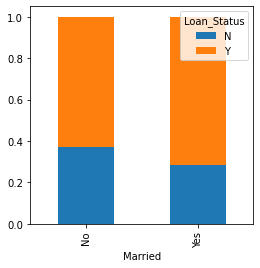

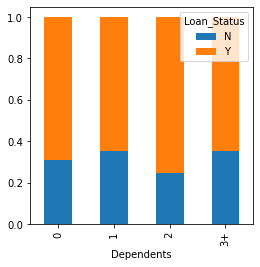

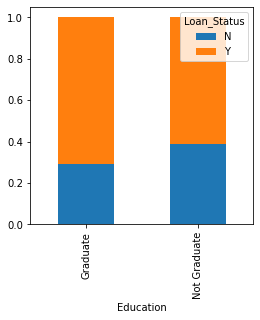

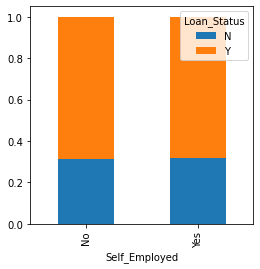

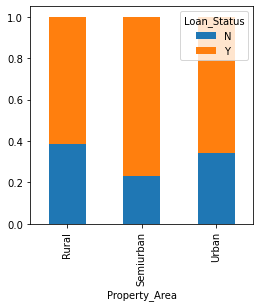

<AxesSubplot:xlabel='Credit_History'>

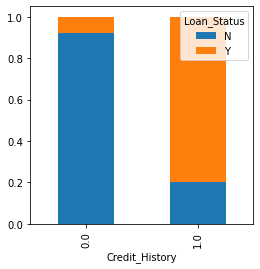

In [94]:
Married.div(Married.sum(1).astype(float), 
            axis = 0).plot(kind='bar', stacked=True, figsize = (4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), 
               axis = 0).plot(kind='bar', stacked=True, figsize = (4,4))
plt.show()
Education.div(Education.sum(1).astype(float), 
              axis = 0).plot(kind='bar', stacked=True, figsize = (4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), 
                  axis = 0).plot(kind='bar', stacked=True, figsize = (4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), 
                  axis = 0).plot(kind='bar', stacked=True, figsize = (4,4))
plt.show()
Credit_History.div(Credit_History.sum(1).astype(float), 
                  axis = 0).plot(kind='bar', stacked=True, figsize = (4,4))

<AxesSubplot:xlabel='Loan_Status'>

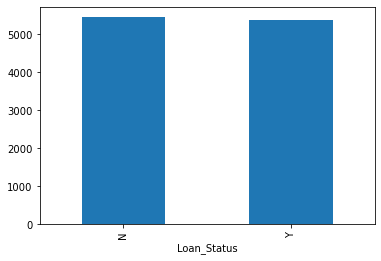

In [95]:
train_dataset.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

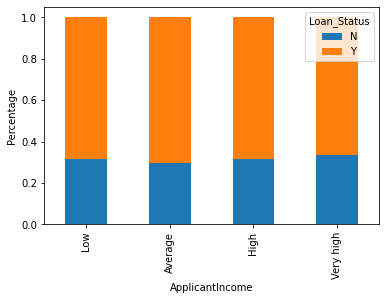

In [96]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train_dataset['Income_bin'] = pd.cut(train_dataset['ApplicantIncome'], bins, labels=group)
Income_bin=pd.crosstab(train_dataset['Income_bin'], train_dataset['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')


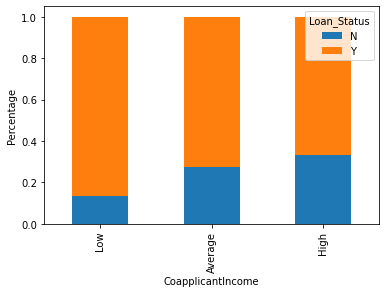

In [97]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train_dataset['Coapplicant_Income_bin'] = pd.cut(train_dataset['CoapplicantIncome'], bins, labels=group)
Coapplicant_Income_bin=pd.crosstab(train_dataset['Coapplicant_Income_bin'], train_dataset['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

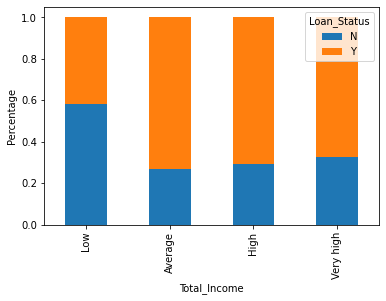

In [98]:
train_dataset['Total_Income']=train_dataset['ApplicantIncome'] + train_dataset['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train_dataset['Total_Income_bin']=pd.cut(train_dataset['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train_dataset['Total_Income_bin'],train_dataset['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

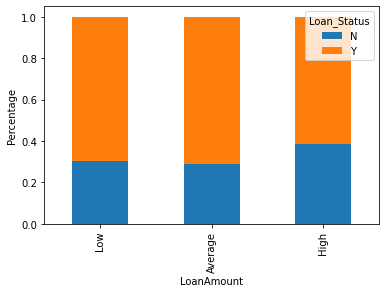

In [99]:
bins=[0,100,200,700]
group=['Low','Average','High']
train_dataset['LoanAmount_bin']=pd.cut(train_dataset['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train_dataset['LoanAmount_bin'],train_dataset['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [100]:
train_dataset = train_dataset.drop(['Income_bin', 'Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'], axis = 1)
train_dataset['Dependents'].replace('3+', 3, inplace=True)
test_dataset['Dependents'].replace('3+', 3, inplace=True)
train_dataset['Loan_Status'].replace('N', 0, inplace=True)
train_dataset['Loan_Status'].replace('Y', 1, inplace=True)

<AxesSubplot:>

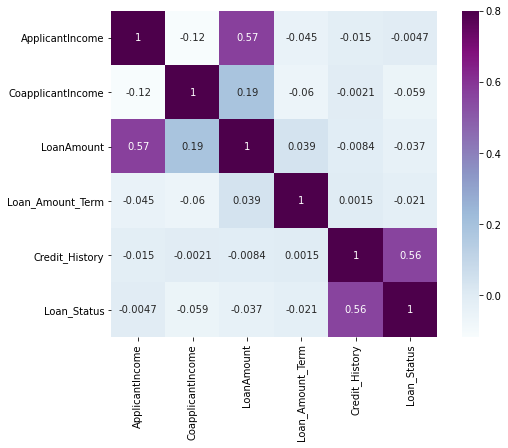

In [101]:
matrix = train_dataset.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

In [102]:
#Checking for missing values
train_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [103]:
train_dataset['Gender'].fillna(train_dataset['Gender'].mode()[0], inplace=True)
train_dataset['Married'].fillna(train_dataset['Married'].mode()[0], inplace=True)
train_dataset['Dependents'].fillna(train_dataset['Dependents'].mode()[0], inplace=True)
train_dataset['Self_Employed'].fillna(train_dataset['Self_Employed'].mode()[0], inplace=True)
train_dataset['Credit_History'].fillna(train_dataset['Credit_History'].mode()[0], inplace=True)

In [104]:
train_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [105]:
train_dataset['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [106]:
train_dataset['Loan_Amount_Term'].fillna(train_dataset['Loan_Amount_Term'].mode()[0], inplace=True)

In [107]:
train_dataset['LoanAmount'].fillna(train_dataset['LoanAmount'].median(), inplace=True)

In [108]:
train_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [109]:
test_dataset['Gender'].fillna(test_dataset['Gender'].mode()[0], inplace=True)
test_dataset['Married'].fillna(test_dataset['Married'].mode()[0], inplace=True)
test_dataset['Dependents'].fillna(test_dataset['Dependents'].mode()[0], inplace=True)
test_dataset['Self_Employed'].fillna(test_dataset['Self_Employed'].mode()[0], inplace=True)
test_dataset['Credit_History'].fillna(test_dataset['Credit_History'].mode()[0], inplace=True)
test_dataset['Loan_Amount_Term'].fillna(test_dataset['Loan_Amount_Term'].mode()[0], inplace=True)
test_dataset['LoanAmount'].fillna(test_dataset['LoanAmount'].median(), inplace=True)

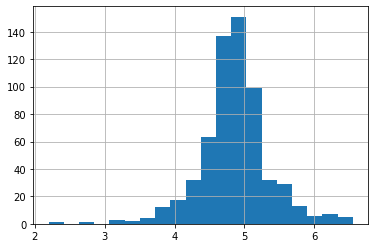

In [110]:
train_dataset['LoanAmount_log']=np.log(train_dataset['LoanAmount'])
train_dataset['LoanAmount_log'].hist(bins=20)
test_dataset['LoanAmount_log']=np.log(test_dataset['LoanAmount'])

In [111]:
train_dataset = train_dataset.drop('Loan_ID',axis=1)
test_dataset = test_dataset.drop('Loan_ID',axis=1)

In [112]:
train_dataset['Total_Income']=train_dataset['ApplicantIncome']+train_dataset['CoapplicantIncome']
test_dataset['Total_Income']=test_dataset['ApplicantIncome']+test_dataset['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income'>

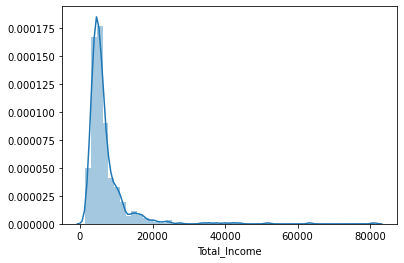

In [113]:
sns.distplot(train_dataset['Total_Income'])

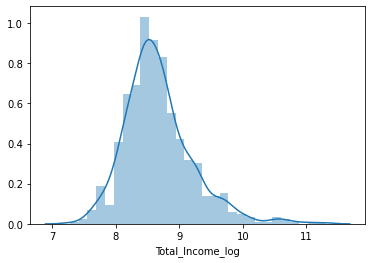

In [114]:
train_dataset['Total_Income_log'] = np.log(train_dataset['Total_Income'])
sns.distplot(train_dataset['Total_Income_log'])
test_dataset['Total_Income_log'] = np.log(test_dataset['Total_Income'])

In [115]:
train_dataset['EMI']=train_dataset['LoanAmount']/train_dataset['Loan_Amount_Term']
test_dataset['EMI']=test_dataset['LoanAmount']/test_dataset['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI'>

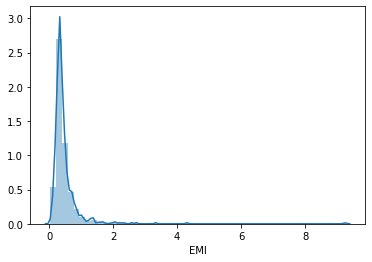

In [116]:
sns.distplot(train_dataset['EMI'])

<AxesSubplot:xlabel='Balance Income'>

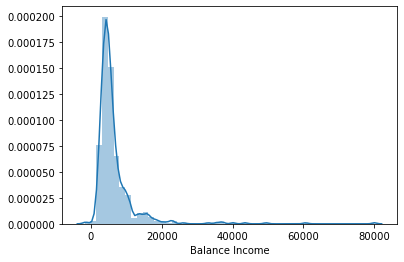

In [117]:
train_dataset['Balance Income'] = train_dataset['Total_Income']-(train_dataset['EMI']*1000)
test_dataset['Balance Income'] = test_dataset['Total_Income']-(test_dataset['EMI']*1000)
sns.distplot(train_dataset['Balance Income'])

In [118]:
train_dataset = train_dataset.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test_dataset = test_dataset.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [119]:
X = train_dataset.drop('Loan_Status',1)
y = train_dataset.Loan_Status

In [120]:
X = pd.get_dummies(X)
train_dataset=pd.get_dummies(train_dataset)
test_dataset=pd.get_dummies(test_dataset)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [149]:
model_params = {
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'C': [1,5,10]
            
        }       
    }, 
    'random_forest' : {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy']
        }
    } 
}

In [150]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_        
    })

In [151]:
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.804213,{'C': 10}
1,random_forest,0.713297,{'n_estimators': 10}
2,decision_tree,0.710725,{'criterion': 'entropy'}
